# Машинное обучение, ФКН ВШЭ

# Практическое задание 4

### Общая информация

Дата выдачи: 28 октября 2019

Мягкий дедлайн: 7:59MSK 11 ноября 2019 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 13 ноября 2019.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-04-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-04-IvanovIvan.ipynb).

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка:** ...

In [1]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Метод опорных векторов и калибровка вероятностней

In [2]:
from sklearn import svm
import warnings
from sklearn.metrics import roc_auc_score, auc, average_precision_score, precision_recall_curve, roc_curve
warnings.simplefilter("ignore")
import seaborn as sns
sns.set_style('darkgrid')

Сгенерируем синтетические данные.

In [5]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [4]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)

/home/dilara/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [5]:
y_pred = lin_clf.decision_function(X_test)

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

In [6]:
roc_auc = roc_auc_score(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred)
print("ROC-AUC = ", roc_auc, "\nPR-AUC = ", pr_auc)

ROC-AUC =  0.9255412065844547 
PR-AUC =  0.9245596179329443


In [7]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
prec, rec, _ = precision_recall_curve(y_test, y_pred)

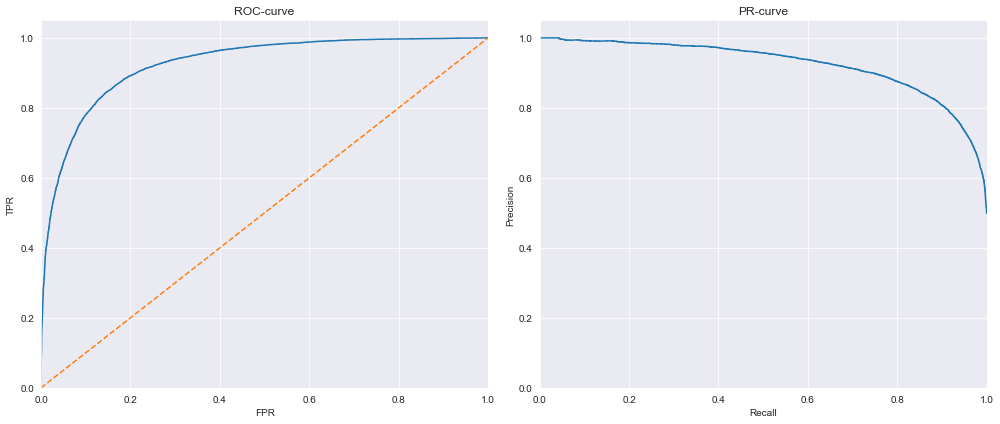

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))
axs[0].plot(fpr, tpr)
axs[0].plot([0, 1], [0, 1], linestyle='--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel("FPR")
axs[0].set_ylabel("TPR")
axs[0].set_title("ROC-curve")
axs[1].plot(rec, prec)
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_title("PR-curve")
axs[1].set_xlabel("Recall")
axs[1].set_ylabel("Precision")
plt.tight_layout()
plt.show()

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками, обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

In [9]:
X2, y2 = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [10]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X2_train, y2_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

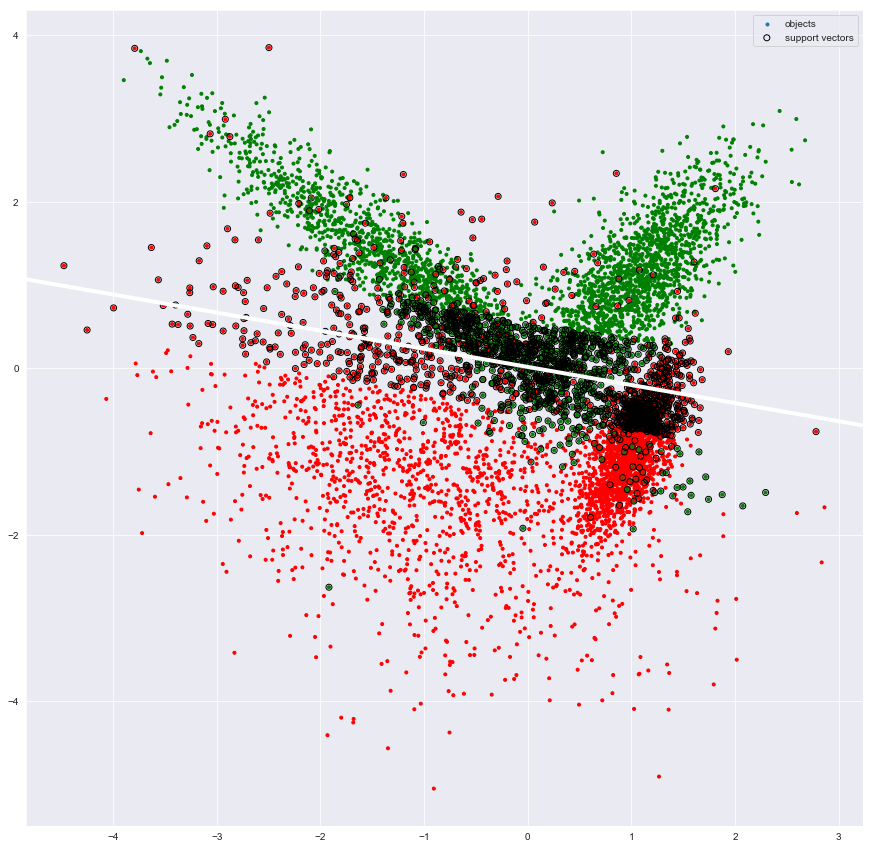

In [11]:
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(15, 15))

# plot objects 
colors = [(1,0,0), (0,0.5,0)]
tatarstan = LinearSegmentedColormap.from_list('tat',colors, N=3)

obj = plt.scatter(X2_train[:, 0], X2_train[:,1], c=y2_train, marker='.', cmap=tatarstan)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf2.decision_function(xy).reshape(XX.shape)

# plot decision boundary
db = ax.contour(XX, YY, Z, colors='white', levels=[0], linewidths=4)

# plot support vectors
sv = ax.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1],
           linewidth=1, facecolors='none', edgecolors='black')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

# legend_elements = [Line2D([0], [0], color='w', lw=2, label='decision boundary')]
plt.legend([obj, sv], ['objects', 'support vectors'])
plt.show()

__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [3]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2) # '-' -> '+'
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1)) # min -> mean
    plt.plot(bin_middle_points, bin_real_ratios)

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

Оставлю от исходной выборки только половину, иначе svm считается бесконечно долго

In [11]:
X_train, y_train = X_train[:3000], y_train[:3000]

In [18]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression().fit(X_train, y_train)
log_pred = log.predict_proba(X_test)

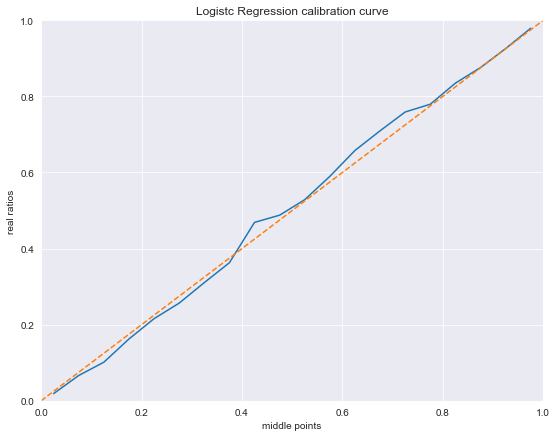

In [18]:
plt.figure(figsize=(9, 7))
plot_calibration_curve(y_test, log_pred[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('Logistc Regression calibration curve')
plt.xlabel('middle points')
plt.ylabel('real ratios')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()

Заметим, что svm возвращает значения не в отрезке [0, 1], поэтому отмасштабируем ответы с помощью minmax_scale

In [8]:
from sklearn.preprocessing import minmax_scale

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

In [28]:
clf_pred = clf.decision_function(X_test)

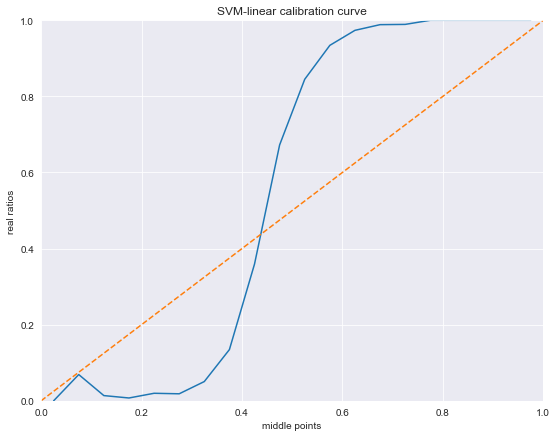

In [29]:
plt.figure(figsize=(9, 7))
plot_calibration_curve(y_test, minmax_scale(clf_pred))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('SVM-linear calibration curve')
plt.xlabel('middle points')
plt.ylabel('real ratios')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()

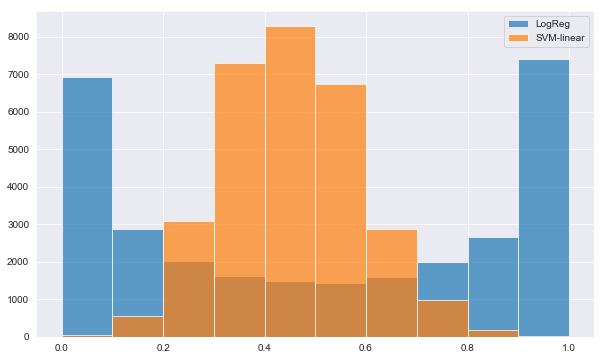

In [30]:
plt.figure(figsize(10,6))
plt.hist(log_pred[:,1], label='LogReg', alpha=0.7)
plt.hist(minmax_scale(clf_pred), label='SVM-linear', alpha=0.7)
plt.legend()
plt.show()

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

In [31]:
from sklearn.calibration import CalibratedClassifierCV

In [32]:
ccv = CalibratedClassifierCV(base_estimator=clf, method='sigmoid')
ccv.fit(X_train, y_train)
ccv_pred = ccv.predict_proba(X_test)

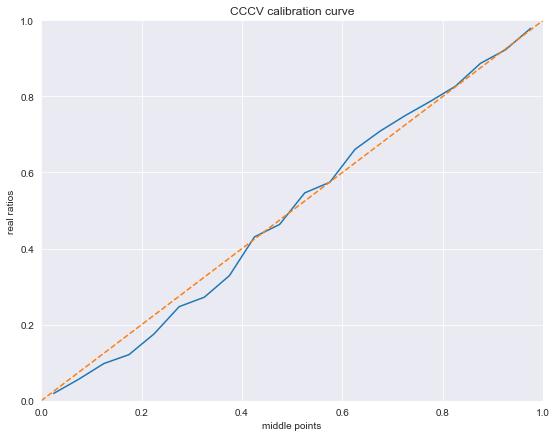

In [34]:
plt.figure(figsize=(9, 7))
plot_calibration_curve(y_test, ccv_pred[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('CCCV calibration curve')
plt.xlabel('middle points')
plt.ylabel('real ratios')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

Обучим линейный SVM и применим к результатам Логистическую регрессию.

In [12]:
X_train, y_train = X_train[:3000], y_train[:3000]

In [13]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Результаты (при SVM), y_pred, - это наша новая выборка для лог регрессии. Разделим ее на train и test и обучим на лог. регрессии

In [15]:
y_pred = clf.decision_function(X_test)

In [16]:
X_cal_train, X_cal_test, y_cal_train, y_cal_test = train_test_split(
    y_pred, y_test, test_size=0.3, random_state=42)

In [20]:
log = LogisticRegression().fit(X_cal_train.reshape( -1, 1 ), y_cal_train)
log_pred = log.predict_proba(X_cal_test.reshape( -1, 1 ))

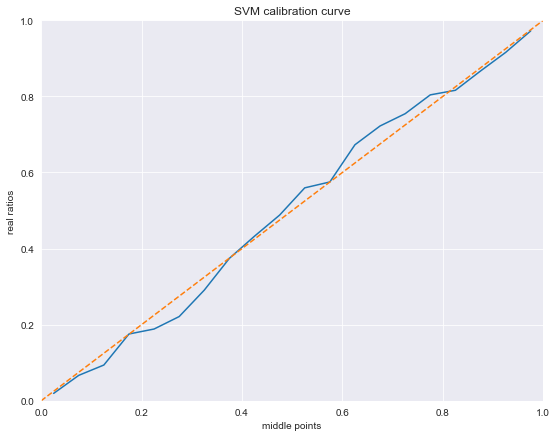

In [22]:
plt.figure(figsize=(9, 7))
plot_calibration_curve(y_cal_test, log_pred[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('SVM calibration curve')
plt.xlabel('middle points')
plt.ylabel('real ratios')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()

## Часть 2. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Подготовка данных.__

Загрузим данные с прошлогоднего конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [445]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [446]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

__Задание 3.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [32]:
log = LogisticRegression().fit(X_train, y_train)
log_pred = log.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, log_pred[:,1])
print(roc_auc)

0.6250600854008652


__Задание 4.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [28]:
categorical = list(X_train.dtypes[['cat' in col for col in X_train.columns.values]].index)

In [30]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical)
],  remainder='passthrough')

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LogisticRegression())
])

In [31]:
%%time
pf = pipeline.fit(X_train, y_train)

CPU times: user 12.8 s, sys: 16 ms, total: 12.8 s
Wall time: 12.8 s


In [33]:
ohe_pred = pipeline.predict_proba(X_test)
roc_auc_ohe = roc_auc_score(y_test, ohe_pred[:,1])
print('withut ohe:\t', roc_auc, '\nwith ohe:\t', roc_auc_ohe)

withut ohe:	 0.6250600854008652 
with ohe:	 0.6329282799141673


Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 5.__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущим экспериментов. Заметили ли вы что-то интересное?

__(1.5 балла)__

In [447]:
x_train = X_train.copy()
x_train['y'] = y_train

x_test = X_test.copy()
x_test['y'] = y_test

In [448]:
for f_j in categorical:
    means = x_train.groupby(f_j)['y'].mean()
    X_train[f_j] = X_train[f_j].map(means)
    
    means = x_test.groupby(f_j)['y'].mean()
    X_test[f_j] = X_test[f_j].map(means)

In [449]:
X_train.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
1049183,0,0.495424,5,0.486512,0.479374,1,0,0,0,0,...,4,3,4,6,0,0,0,0,0,0
106872,1,0.495424,3,0.516808,0.479374,0,1,0,0,0,...,9,0,4,12,0,1,1,0,0,0
28943,6,0.508632,7,0.516808,0.479374,0,0,1,0,0,...,4,1,2,7,0,1,1,0,1,0
851826,1,0.495424,5,0.516808,0.479374,0,0,1,0,0,...,6,2,2,10,0,0,1,0,0,0
934813,0,0.495424,1,0.486512,0.611746,1,0,0,0,0,...,9,1,2,14,0,1,1,0,0,0


In [129]:
# slow v
'''for f_j in categorical:
    a = x_train.groupby(f_j).y.sum()
    b = x_train.groupby(f_j).y.count()
    X_train[f_j] = x_train.apply(lambda x : a[x[f_j]] / b[x[f_j]], axis=1)'''

'for f_j in categorical:\n    a = x_train.groupby(f_j).y.sum()\n    b = x_train.groupby(f_j).y.count()\n    X_train[f_j] = x_train.apply(lambda x : a[x[f_j]] / b[x[f_j]], axis=1)'

In [38]:
%%time
log2 = LogisticRegression().fit(X_train, y_train)

CPU times: user 9.94 s, sys: 16 ms, total: 9.96 s
Wall time: 9.96 s


In [40]:
log2_pred = log2.predict_proba(X_test)
roc_auc2 = roc_auc_score(y_test, log2_pred[:,1])
print('previous: %lf\n current: %lf' % (roc_auc_ohe, roc_auc2))

previous: 0.632928
 current: 0.630491


In [43]:
roc_auc2

0.6304908270790679

Результат стал чуть хуже, чем с ohe, но работает быстрее

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__Задание 6.__ Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.

__(1 балл)__

Сгенерируем шум с помощью нормального распределения со средним = 0 и с различными дисперсиями

In [450]:
sigmas = [10 ** i for i in range(-4, -1)]
roc = [[], [], []]

for i in range(4):
    j = -1
    for sigma in sigmas:
        j += 1
        x_train = X_train.copy()
        x_test = X_test.copy()
        for f_j in categorical:
            noise = np.random.normal(0, sigma, len(X_train[f_j]))
            x_train[f_j] += noise
        
            noise = np.random.normal(0, sigma, len(X_test[f_j]))
            x_test[f_j] += noise
        log = LogisticRegression().fit(x_train, y_train)
        log_pred = log.predict_proba(x_test)
        roc[j].append(roc_auc_score(y_test, log_pred[:,1]))

In [451]:
for i in range(len(sigmas)):
    print('\nsigma = ', sigmas[i], '\nroc-auc = ', np.mean(roc[i]))


sigma =  0.0001 
roc-auc =  0.6304918237790822

sigma =  0.001 
roc-auc =  0.6304889936790415

sigma =  0.01 
roc-auc =  0.6295680132657794


Видно, что лучший результат дает шум при сигме = 0.0001

__(Бонусная часть)__ Посчитайте корректные счётчики первым или вторым способов из описанных выше (не забудьте добавить и шум). 

__(+0.5 балла)__

In [452]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)
fold_size = 1000
n_folds = len(X_train) // fold_size
sigma = 0.001

x_train, x_test = X_train.copy(), X_test.copy()
x_train['y'] = y_train
x_test['y'] = y_test

In [453]:
for f_j in categorical:
    x_train['tmp'] = x_train[f_j]
    
    for i in range(n_folds):
        to_del = [x for x in range(i * fold_size, i * fold_size + fold_size)]
        rrow = x_train.index[to_del]
        xtrain = x_train.drop(rrow)
        x_train.loc[rrow, 'tmp'] = x_train.loc[rrow, f_j].map(xtrain.groupby(f_j)['y'].mean())
    
    noise = np.random.normal(0, sigma, len(x_train[f_j]))
    x_train[f_j] = x_train['tmp']
    x_train[f_j] += noise

In [454]:
X_train = x_train.drop(columns=['tmp', 'y'])

In [455]:
log = LogisticRegression().fit(X_train, y_train)
log_pred = log.predict_proba(X_test)
roc_auc_score(y_test, log_pred[:,1])

0.5057491220683931

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Добавьте сглаживание, описанное выше и повторите эксперименты.

__(1 балл)__

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [46]:
x_train, x_test = X_train.copy(), X_test.copy()
x_train['y'], x_test['y'] = y_train, y_test

In [47]:
def calc_smooth_mean(data, cat, target, C):
    global_mean = data[target].mean()

    agg = data.groupby(cat)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    smooth = (counts * means + C * global_mean) / (counts + C)

    return data[cat].map(smooth)

In [48]:
%%time
for f_j in categorical:
    X_train[f_j] = calc_smooth_mean(x_train, f_j, 'y', 10)
    X_test[f_j] = calc_smooth_mean(x_test, f_j, 'y', 10)

CPU times: user 436 ms, sys: 44 ms, total: 480 ms
Wall time: 477 ms


In [49]:
log = LogisticRegression().fit(X_train, y_train)
log_pred = log.predict_proba(X_test)
print(roc_auc_score(y_test, log_pred[:,1]))

0.6324762917615712


__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

__Ответ:__ 
1. Нет огромного кол-ва разреженных признаков, как в one-hot.
2. Есть риск переобучиться.
3. Результаты получились хуже, чем с one-hot.

## Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [283]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [291]:
def onehot(df, categorical):
    X = df.copy()
    for f_j in categorical:
        df = pd.concat([df,
                        pd.get_dummies(X[f_j], prefix=f_j)
                       ], axis=1)
    return df

In [292]:
print('количество признаков ДО ohe  = ', X_train.shape[1])

количество признаков ДО ohe  =  241


In [289]:
X_train = onehot(X_train, categorical)

In [293]:
X_train.shape

(476169, 241)

In [294]:
X_train.drop(columns=categorical, inplace=True)

In [295]:
print('количество признаков после ohe (и удаления исходных категориальных) = ', X_train.shape[1])

количество признаков после ohe (и удаления исходных категориальных) =  227


In [296]:
X_test = onehot(X_test, categorical)
X_test.drop(columns=categorical, inplace=True)

В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [297]:
log = LogisticRegression().fit(X_train, y_train)

In [298]:
log_pred = log.predict_proba(X_test)
roc_auc_main = roc_auc_score(y_test, log_pred[:,1])
print(roc_auc_main)

0.6380771288734163


### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков.

Изменилось ли качество? Как?

__(0.5 балла)__

In [299]:
from sklearn.linear_model import Ridge

In [300]:
saved_x_train, saved_x_test = X_train.copy(), X_test.copy()

In [301]:
x_train, x_test = X_train.copy(), X_test.copy()

In [304]:
def to_delete(X_train, ws):
    '''
    returns an array of columns(features) to delete
    '''
    
    # sort weights by abs
    delete = []
    srtd = sort(ws)
    for i in range(213):
        if ws[i] in srtd[:27]:
            delete.append(i)
            
    # find feature names to delete   
    del_col = []
    for d in delete:
        del_col.append(X_train.columns[d])
        
    return del_col

def feat_selection(X_train, x_train, y_train, X_test, x_test):
    '''
    performs embedded feature selection
    '''
    rg = Ridge().fit(X_train, y_train)
    rp = rg.predict(X_test)
    ws = np.abs(rg.coef_)

    del_col = to_delete(X_train, ws)
    
    x_train = X_train.drop(del_col, axis=1)
    x_test = X_test.drop(del_col, axis=1)
    return (x_train, x_test)

In [305]:
%%time
x_train, x_test = feat_selection(X_train, x_train, y_train, X_test, x_test)

CPU times: user 3.83 s, sys: 11.4 s, total: 15.2 s
Wall time: 12.8 s


In [306]:
x_train.shape

(476169, 200)

In [307]:
log = LogisticRegression().fit(x_train, y_train)
log_pred = log.predict_proba(x_test)
roc_auc_emb = roc_auc_score(y_test, log_pred[:,1])
print('saved roc-auc', roc_auc_main)
print('roc-auc with embedding', roc_auc_emb)

saved roc-auc 0.6380771288734163
roc-auc with embedding 0.6385329685480873


чуть лучше

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [308]:
from sklearn.preprocessing import StandardScaler

In [309]:
X_train, X_test = saved_x_train.copy(), saved_x_test.copy()

In [310]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

rg = Ridge().fit(x_train, y_train)
rp = rg.predict(x_test)
ws = np.abs(rg.coef_)

del_col = to_delete(X_train, ws)
    
x_train = X_train.drop(del_col, axis=1)
x_test = X_test.drop(del_col, axis=1)

In [311]:
log = LogisticRegression().fit(x_train, y_train)
log_pred = log.predict_proba(x_test)
roc_auc_scale = roc_auc_score(y_test, log_pred[:,1])
print('embedded roc-auc without scaling: ', roc_auc_emb)
print('embedded roc-auc with scaling: ', roc_auc_scale)

embedded roc-auc without scaling:  0.6385329685480873
embedded roc-auc with scaling:  0.6379446572637215


### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $mu$, $sigma$, $n$ соответственно среднее, среднеквадратичное отклонение и количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков в этом случаев.

__(0.5 балла)__

In [312]:
x_train, x_test = X_train.copy(), X_test.copy()
x_train['y'] = y_train

In [313]:
%%time

# mu
mu = x_train.groupby('y').mean()
mu_pos = mu.iloc[1,]
mu_neg = mu.iloc[0,]

# sigma
var = x_train.groupby('y').var()
var_pos = var.iloc[1,]
var_neg = var.iloc[0,]

# n
ns = x_train.groupby('y').count()
n_pos = ns.iloc[1,]
n_neg = ns.iloc[0,]

# calculate t-statistics
cats = X_train.columns
t = []
for ct in cats:
    a = np.abs(mu_pos[ct] - mu_neg[ct])
    b = np.sqrt((n_pos[ct] * var_pos[ct] + n_neg[ct] * var_neg[ct]) / (n_pos[ct] + n_neg[ct]))
    t.append(a / b)
    
del_col = to_delete(X_train, t)

x_train = X_train.drop(del_col, axis=1)
x_test = X_test.drop(del_col, axis=1)

CPU times: user 3.28 s, sys: 1.97 s, total: 5.25 s
Wall time: 5.36 s


In [314]:
log = LogisticRegression().fit(x_train, y_train)
log_pred = log.predict_proba(x_test)
roc_auc_fil = roc_auc_score(y_test, log_pred[:,1])
print('saved roc-auc: ', roc_auc_main)
print('roc-auc with filter methods: ', roc_auc_fil)

saved roc-auc:  0.6380771288734163
roc-auc with filter methods:  0.6386090245362201


In [315]:
saved_y_train, saved_y_test = y_train.copy(), y_test.copy()

### Методы-обёртки

__Задание 10.__ 

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо. 

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [319]:
X_train, X_test = saved_x_train.copy(), saved_x_test.copy()
y_train, y = saved_y_train.copy(), saved_y_test.copy()

In [320]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train[:10000], y_train[:10000], test_size=0.2, random_state=10)

In [321]:
def wrapper_feat_select(X_train, X_valid, y_train, y_valid):
    features = X_train.columns
    feat_score = []
    
    for f in features:
        log = LogisticRegression().fit(X_train.drop(columns=f), y_train)
        log_pred = log.predict_proba(X_valid.drop(columns=f))
        
        feat_score.append(roc_auc_score(y_valid, log_pred[:,1]))
    return X_train.columns[np.argmin(feat_score)]

In [322]:
%%time
deleted_cols=[]
del_col = wrapper_feat_select(X_train, X_valid, y_train, y_valid)
deleted_cols.append(del_col)
X_train = X_train.drop(del_col, axis=1)
X_valid = X_valid.drop(del_col, axis=1)

CPU times: user 1min 18s, sys: 49.9 s, total: 2min 8s
Wall time: 56.2 s


Так как 1 признак уже удален, осталось еще 26

In [323]:
%%time
for i in range(26):
    del_col = wrapper_feat_select(X_train, X_valid, y_train, y_valid)
    deleted_cols.append(del_col)
    X_train = X_train.drop(del_col, axis=1)
    X_valid = X_valid.drop(del_col, axis=1)

CPU times: user 31min 23s, sys: 18min 56s, total: 50min 19s
Wall time: 23min 27s


In [325]:
X_train.shape

(8000, 200)

In [332]:
X_train, X_test = saved_x_train.copy(), saved_x_test.copy()
y_train, y_test = saved_y_train.copy(), saved_y_test.copy()

In [333]:
X_train = X_train.drop(columns=deleted_cols)
X_test = X_test.drop(columns=deleted_cols)

In [334]:
log = LogisticRegression().fit(X_train, y_train)
log_pred = log.predict_proba(X_test)
print(roc_auc_score(y_test, log_pred[:,1]))

0.6320721816070946


норм, но не лучше

Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ:** Изначально (0.6380771288734163)

К лучшему результату привел метод фильтрации(0.6386090245362201), тем не менее качество, полученное с помощью отбора встроенными методами(0.6385329685480873) мало уступает качеству, полученному с помощью методов фильтрации. Метод-обертки дал худшие результаты(0.6320721816070946).

Методы фильтрации:
    + самые быстрые, линейная зависимость от количества признаков
    - вообще не учитывают таргет, а также связь с другими признаками

Встроенные методы:
    + признаки отбираются прямо во время обучения модели (хотя мб это не +)
    + быстрее, чем оберточные методы
    - медленее методов фильтрации

Оберточные методы:
    + большое количество способов реализации (не только жадный алгоритм)
    - самые медленные
    - есть риск переобучения

## Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку. 

Воспользуемся той же самый задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты. 

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000. 

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [97]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [102]:
y_train.mean()

0.036484945471040746

мб потому что люди нечасто обращаются в страховые???...?

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [103]:
categorical = list(X_train.dtypes[['cat' in col for col in X_train.columns.values]].index)

X_train = onehot(X_train, categorical)
X_train.drop(columns=categorical, inplace=True)

X_test = onehot(X_test, categorical)
X_test.drop(columns=categorical, inplace=True)

В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [104]:
log = LogisticRegression().fit(X_train, y_train)
log_pred = log.predict_proba(X_test)

Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

In [105]:
roc_auc = roc_auc_score(y_test, log_pred[:,1])
print(roc_auc)

0.6379478849328375


Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

In [107]:
prec, rec, thr_pr = precision_recall_curve(y_test, log_pred[:,1])
average_precision = average_precision_score(y_test, log_pred[:,1])

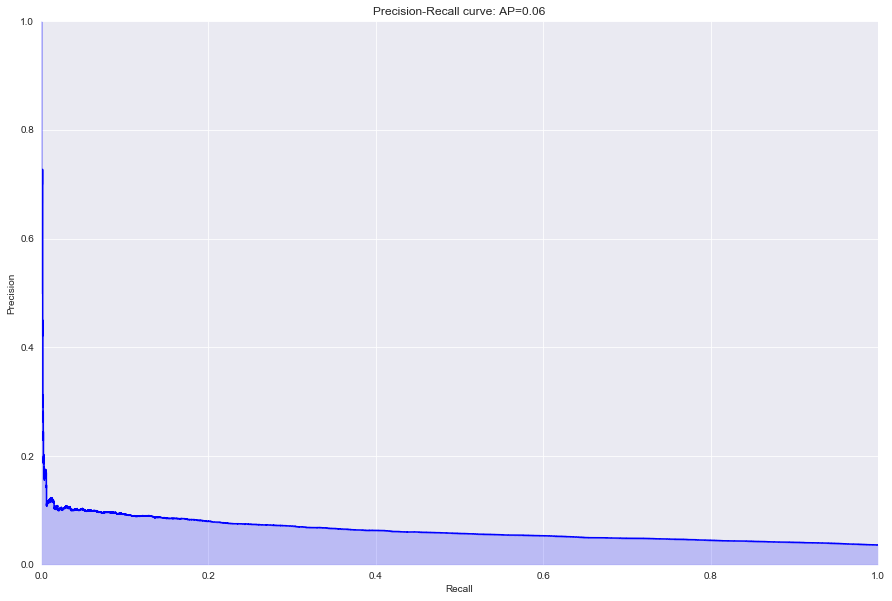

In [152]:
from inspect import signature
plt.figure(figsize=(15,10))
#plt.plot(rec, prec)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(rec, prec, color='b',
         where='post')
plt.fill_between(rec, prec, alpha=0.2, color='b', **step_kwargs)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 11.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положителных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем?

То есть, мы хотим, чтобы precision = TP / (TP + FP) = 95%


Попробуем отсортировать, получившиеся выше результаты для pr-curve, :

|precision - 0.95| и взять самый маленький результат.

In [251]:
thr_ind = argmin(np.abs(prec - 0.95))
threshold = thr_pr[thr_ind]

In [252]:
print('threshold =\t%f\nprecision =\t%f\nrecall =\t%f\n' %
      (threshold, prec[thr_ind], rec[thr_ind]))

threshold =	0.479459
precision =	1.000000
recall =	0.000463



In [253]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score

In [254]:
y_pred = (log_pred[:,1] > threshold).astype(int)
print(precision_score(y_test, y_pred), recall_score(y_test, y_pred))

1.0 0.00023142791020597085


In [259]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tp

1

Получается, мы откажем ~ 0.00023 части клиентов, или точнее 1 клиенту

Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился. 

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги, и те, кто не обратился бы, то есть принёс бы нам деньги. Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной. 

__Задание 12.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный. 

__(1 балл)__

Мы отказываем, когда модель предсказывает 1, т.е. a(x) = 1.

Тогда доход = 5000 * FP

расход = 100000 * TP

In [201]:
srtd_thr = sort(thr_pr)
for t in srtd_thr:
    ypred = (log_pred[:,1] > t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, ypred).ravel()
    income = 5000 * fp
    cons = 100000 * tp
    delta = income - cons
    
    if (delta >= 0):
        print('threshold = ', t)
        print('balance = ', delta)
        best_t, best_d = t, delta
        break

threshold =  0.011489392326212431
balance =  140940000


А на каком значение порога это разнциа максимальна? Скольким клиентам мы отказали в обслуживании?

In [220]:
ypred = (log_pred[:,1] > 0.029).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, ypred).ravel()
income = 5000 * fp
cons = 100000 * tp
(income - cons) / 10 ** 5

26.15

In [234]:
def find_max(ts, res):
    for t in ts:
        ypred = (log_pred[:,1] > t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, ypred).ravel()
        income = 5000 * fp
        cons = 100000 * tp
        delta = income - cons
        
        if (delta >= 0 and res[1] < delta):
            res = (t, delta)
    print(res)

In [235]:
# srtd_thr = sort(thr_pr)
res = (best_t, best_d)
ts = [(x + 1) / 100 for x in range(1, 10)]
find_max(ts, res)

(0.011489392326212431, 140940000)


Рассмотрим ближе интервал от [0.01; 0.02]

In [241]:
ts = np.arange(0.011489392326212431, 0.2, 0.005)
find_max(ts, res)

(0.011489392326212431, 140940000)


In [248]:
ts = np.arange(0.3, 0.48, 0.01)
find_max(ts, res)

(0.011489392326212431, 140940000)


Максимальное значение = 140940000 при t = 0.011489392326212431

In [261]:
ypred = (log_pred[:,1] > res[0]).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, ypred).ravel()

In [263]:
tp

4320

Отказали 4320 клиентам в обслуживании

## Часть 3 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

__Задание 13.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__
- несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ